In [30]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def read_summary(f_path):
    summary = open(f_path)
    data = {
        'status':[],
        'time':[]
    }
    for l in summary:
        if "#Property" in l:
            aux = int(l.split(' ')[-1])
            data['status'].append('timeout')
            data['time'].append(1800.0)
            # data[aux] = {
            #     'status':'timeout',
            #     'time':1800.0
            # }
        if '##Status:' in l:
            if 'Error' in l:
                data['status'][aux] = 'error'
            else:
                data['status'][aux] = l.split(' ')[-1].split('\n')[0]
        if '##Time:' in l:
            data['time'][aux] = float(l.split(' ')[-1])

    return data

In [44]:
results = {
    15:{
        'neurify':{},
        'verinet':{},
        'BIM':{},
        'PGD':{}
    },
    45:{
        'neurify':{},
        'verinet':{},
        'BIM':{},
        'PGD':{}
    }
}

for degrees in [15,45]:
    for i, tool in enumerate(['neurify', 'verinet', 'BIM', 'PGD']):
        tool_type = 'verifiers' if i<2 else 'falsifiers'
        f_path = f'experiments/{degrees}/{tool_type}/{tool}/result_summary.md'
        results[degrees][tool] = read_summary(f_path)

In [45]:
### Get amount of counter-examples
count_ce = {
    15:[],
    45:[]
}
degrees = [15,45]
tools = ['neurify', 'verinet', 'BIM', 'PGD']
for degree in degrees:
    for tool in tools:
        aux = 0
        for status, time in zip(results[degree][tool]['status'], results[degree][tool]['time']):
            if status == 'sat':
                aux += 1
        count_ce[degree].append(aux)

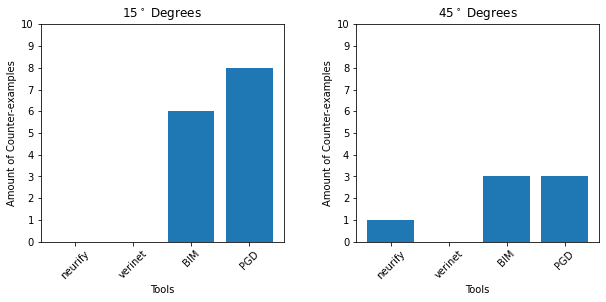

In [46]:
fig, axs = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(10)
plt.subplots_adjust(wspace=0.3, hspace=0.5)

axs[0].bar(list(range(4)), count_ce[15]);
axs[0].set_xticks(list(range(0,4)));
axs[0].set_yticks(list(range(0,11)));
axs[0].set_xticklabels(tools, rotation=45);
axs[0].set_title('$15^\circ$ Degrees');
axs[0].set_xlabel('Tools');
axs[0].set_ylabel('Amount of Counter-examples');

axs[1].bar(list(range(4)), count_ce[45]);
axs[1].set_xticks(list(range(0,4)));
axs[1].set_yticks(list(range(0,11)));
axs[1].set_xticklabels(tools, rotation=45);
axs[1].set_title('$45^\circ$ Degrees');
axs[1].set_xlabel('Tools');
axs[1].set_ylabel('Amount of Counter-examples');

In [57]:
### Verifiers results
table_v = pd.DataFrame(columns=['neurify', 'verinet'], index=['sat', 'error', 'timeout'])
table_v.loc['sat'] = [results[15]['neurify']['status'].count('sat') + results[45]['neurify']['status'].count('sat'),
    results[15]['verinet']['status'].count('sat') + results[15]['verinet']['status'].count('sat')]
table_v.loc['error'] = [results[15]['neurify']['status'].count('error') + results[45]['neurify']['status'].count('error'),
    results[15]['verinet']['status'].count('error') + results[45]['verinet']['status'].count('error')]
table_v.loc['timeout'] = [results[15]['neurify']['status'].count('timeout') + results[45]['neurify']['status'].count('timeout'), 
    results[15]['verinet']['status'].count('timeout') + results[45]['verinet']['status'].count('timeout')]
table_v

,neurify,verinet
sat,1,0
error,7,9
timeout,12,11


In [56]:
### Verifiers results
table_f = pd.DataFrame(columns=['BIM', 'PGD'], index=['sat', 'unknown', 'timeout'])
table_f.loc['sat'] = [results[15]['BIM']['status'].count('sat') + results[45]['BIM']['status'].count('sat'),
    results[15]['PGD']['status'].count('sat') + results[15]['PGD']['status'].count('sat')]
table_f.loc['unknown'] = [results[15]['BIM']['status'].count('unknown') + results[45]['BIM']['status'].count('unknown'),
    results[15]['PGD']['status'].count('unknown') + results[45]['PGD']['status'].count('unknown')]
table_f.loc['timeout'] = [results[15]['BIM']['status'].count('timeout') + results[45]['BIM']['status'].count('timeout'), 
    results[15]['PGD']['status'].count('timeout') + results[45]['PGD']['status'].count('timeout')]
table_f

,BIM,PGD
sat,9,16
unknown,11,0
timeout,0,9


# Deprecated

In [22]:
### Get times
times = {
    15:[],
    45:[]
}
degrees = [15,45]
tools = ['neurify', 'verinet', 'BIM', 'PGD']
for degree in degrees:
    for tool in tools:
        aux = []
        for status, time in zip(results[degree][tool]['status'], results[degree][tool]['time']):
            if status == 'sat' or status == 'unsat':
                aux.append(time)
        times[degree].append(aux)

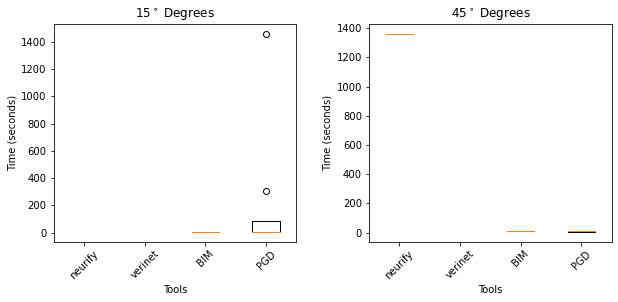

In [24]:
fig, axs = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(10)
plt.subplots_adjust(wspace=0.3, hspace=0.5)

for i, degree in enumerate(degrees):
    axs[i].boxplot(times[degree])
    axs[i].set_xticks(list(range(1,5)));
    axs[i].set_xticklabels(tools, rotation=45);
    axs[i].set_title(f'${degree}^\circ$ Degrees');
    axs[i].set_xlabel('Tools');
    axs[i].set_ylabel('Time (seconds)');